<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, you must ensure your location is in the same level as 'data' floder

In [15]:
%cd /content/drive/MyDrive/Github/309CourseWork2

/content/drive/MyDrive/Github/309CourseWork2


import moudle

In [16]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from concurrent.futures import ThreadPoolExecutor,as_completed

load meat data

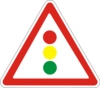

In [17]:
path = './data/meta'
meta = {}
for file_name in os.listdir(path):
  key = file_name.replace('.png', '')
  meta[int(key)] = Image.open(os.path.join(path, file_name))

meta[26]

multithreading load train data 

In [18]:
def load_signle_floder_img(path, label):
  img_list= []
  label_list = []
  for file_name in os.listdir(os.path.join(path, label)):
    img = Image.open(os.path.join(path, label, file_name))
    img = img.resize(size=(32,32))
    img_list.append(np.array(img))
    label_list.append(label)
  return img_list, label_list

path = './data/train'
with ThreadPoolExecutor(5) as executor:
  future_list = [executor.submit(load_signle_floder_img, path, label) for label in os.listdir(path)]

img_list = [] 
label_list = []
for future in as_completed(future_list):
  img_sub_list, label_sub_list = future.result()
  img_list += img_sub_list
  label_list += label_sub_list

check shape

In [19]:
X_train = np.array(img_list, dtype=int)
Y_train = np.array(label_list, ndmin=1, dtype=int)
X_train.shape, Y_train.shape

((30448, 32, 32, 3), (30448,))

feature scale

In [20]:
X_train = X_train/255

show image

label and sample


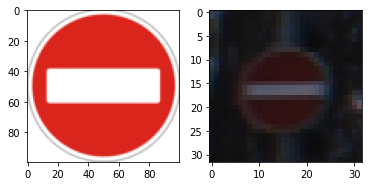

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
index = 30000
print('label and sample')
ax1.imshow(meta[Y_train[index]])
ax2.imshow(X_train[index])

start with a simple model

In [29]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(26, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 100, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/100
857/857 [==============================] - 10s 11ms/step - loss: 2.3336 - accuracy: 0.3743 - val_loss: 5.5111 - val_accuracy: 0.0000e+00
Epoch 2/100
857/857 [==============================] - 8s 10ms/step - loss: 1.3936 - accuracy: 0.6220 - val_loss: 5.0447 - val_accuracy: 0.2989
Epoch 3/100
857/857 [==============================] - 8s 10ms/step - loss: 0.9689 - accuracy: 0.7444 - val_loss: 6.2325 - val_accuracy: 0.3924
Epoch 4/100
857/857 [==============================] - 9s 10ms/step - loss: 0.7435 - accuracy: 0.8116 - val_loss: 7.0375 - val_accuracy: 0.4568
Epoch 5/100
857/857 [==============================] - 7s 9ms/step - loss: 0.6028 - accuracy: 0.8489 - val_loss: 8.0238 - val_accuracy: 0.5215
Epoch 6/100
857/857 [==============================] - 9s 11ms/step - loss: 0.5244 - accuracy: 0.8702 - val_loss: 8.4978 - val_accuracy: 0.4640
Epoch 7/100
857/857 [==============================] - 7s 9ms/step - loss: 0.4525 - accuracy: 0.8900 - val_loss: 11.0399 - val_accur

train acc/loss and val acc/loss

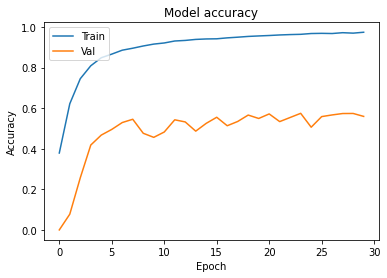

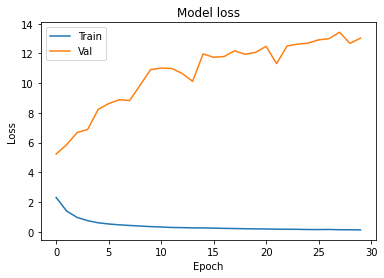

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

overfitting